In [37]:
import pprint
from rdflib import Namespace
from cmmn3 import parseModel, convertModel
from cmmn3 import reason

n3Path = "cmmn3/n3/"
xmlNs = {"cmmn": "http://www.omg.org/spec/CMMN/20151109/MODEL"}
modelNs = Namespace("http://ontario.org/qbp/cap#")

xmlPath = "/Users/wvw/Dropbox/research/projects/Montfort PM/cmmn/cap-all.cmmn"
modelPath = "ttl/cap/model.ttl"
obsPath = "ttl/cap/obs.ttl"
imgPath = "js/diagram.png"

## Model

In [38]:
itemObjs = parseModel(xmlPath, xmlNs)
# pprint.pprint(itemObjs)

convertModel(itemObjs, modelNs, modelPath)

## Log

In [39]:
from cmmn3 import convertLog

log_stmts = convertLog("csv/log.csv", modelNs)
with open(obsPath, 'w') as fh:
    fh.write(log_stmts[0])

## Reason

In [40]:
out = reason(modelPath, obsPath, n3Path, printerr=True)
print(out)

time: 0.07968520815484226
error: eye --quiet ttl/cap/model.ttl ttl/cap/obs.ttl cmmn3/n3/graph.n3 cmmn3/n3/state.n3 cmmn3/n3/workflow.n3 cmmn3/n3/run.n3 --nope --pass-only-new
EYE v11.23.2 (2025-12-09)
SWI-Prolog version 9.2.7
starting 26 [msec cputime] 30 [msec walltime]
GET file:///Users/wvw/git/pm/decl_cig/cmmn3/ttl/cap/model.ttl SC=129
GET file:///Users/wvw/git/pm/decl_cig/cmmn3/ttl/cap/obs.ttl SC=1
GET file:///Users/wvw/git/pm/decl_cig/cmmn3/cmmn3/n3/graph.n3 SC=1
GET file:///Users/wvw/git/pm/decl_cig/cmmn3/cmmn3/n3/state.n3 SC=3
GET file:///Users/wvw/git/pm/decl_cig/cmmn3/cmmn3/n3/workflow.n3 SC=17
GET file:///Users/wvw/git/pm/decl_cig/cmmn3/cmmn3/n3/run.n3 SC=8
networking 18 [msec cputime] 20 [msec walltime]
reasoning 15 [msec cputime] 17 [msec walltime]
2026-01-31T21:18:29.634Z in=159 out=12 ent=24 step=48 brake=4 inf=520999 sec=0.059 inf/sec=8830492


# Processed by EYE v11.23.2 (2025-12-09)
# eye --quiet ttl/cap/model.ttl ttl/cap/obs.ttl cmmn3/n3/graph.n3 cmmn3/n3/state.n3 cmm

# Show

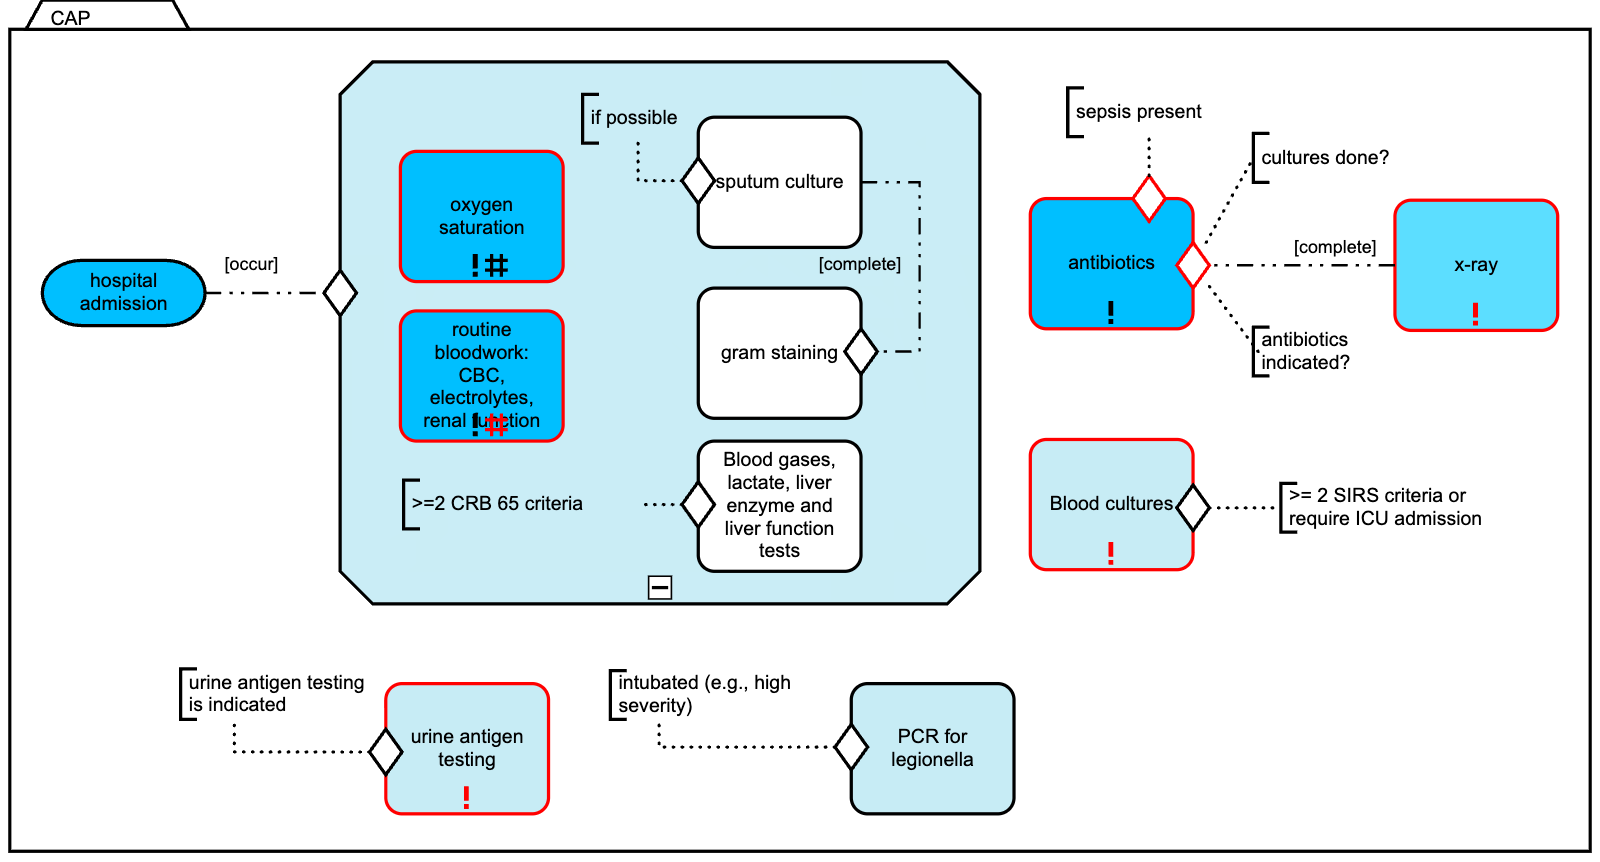

In [42]:
from cmmn3 import parseOut, visualize
from IPython.display import Image, display

pout = parseOut(out, itemObjs)
visualize(pout, itemObjs, xmlPath, imgPath)

display(Image(filename=imgPath))